# Automated Machine Learning (Auto ML) with PyCaret
In this project, we embark on a journey into the realm of Data Science and Machine Learning, specifically tailored for the Health sector. Our mission is to conduct an in-depth exploratory analysis of the provided dataset, followed by the creation of a predictive model aimed at estimating insurance values based on the rich information encapsulated within.

## Project Objectives
### 1. Exploratory Analysis:
Uncover insights through a comprehensive exploratory analysis of the dataset, gaining a deep understanding of the underlying patterns and relationships.

### 2. Predictive Modeling:
Develop a robust predictive model utilizing the Regression technique. This model will serve as a valuable tool in estimating insurance values, contributing to informed decision-making in the Health Insurance domain.

## Key Components:
1. **Algorithm Selection**: Auto ML automates the tedious task of algorithm selection, choosing the most suitable models for our regression task.

2. **Hyperparameter Tuning**: The optimization of model parameters is handled seamlessly, ensuring the best possible performance without the need for manual tuning.

3. **Model Evaluation**: Auto ML provides automated model evaluation, enabling us to assess performance metrics and choose the most effective model for our specific Health Insurance prediction requirements.

## Variable dictionary
- `Age`: Age
- `Sex`: Gender i.e. Male/Female
- `BMI`: Body Mass Index
- `Children`: How many children do they have?
- `Smoker`: Whether the person is an active smoker or not?
- `Region`: Region in which the person resides.
- `Charges`: Amount charged for health insurance.

## Importing pandas

In [1]:
import pandas as pd

## Importing the dataset into the 'df' i.e. the dataframe as a .csv file

In [2]:
df = pd.read_csv("Original Datasets/insurance.csv")

## To view the top 5 elements of the dataset.

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## To view the number of column and row parameters.

In [11]:
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataframe has 1338 rows and 7 columns.


## To list down all the column names.

In [12]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


## Describing all the paramters.

In [13]:
print("Information from the 'Age' column:\n")
print(df.age.describe(),"\n\n")

print("Information from the 'BMI' column:\n")
print(df.bmi.describe(),"\n\n")

print("Information from the 'Charges' column:\n")
print(df.charges.describe())

Information from the 'Age' column:

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64 


Information from the 'BMI' column:

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64 


Information from the 'Charges' column:

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


## To make our work easier and improve the readability of the model, we will create a column of binary values ​​for "smokers" or "non-smokers"

In [14]:
df["is_smoker"] = df["smoker"].map({"yes":1, "no":0})

print(df["is_smoker"].head())

0    1
1    0
2    0
3    0
4    0
Name: is_smoker, dtype: int64


In the same way as in the previous field, we will create a binary column for children.

Unlike the "smoker" column, this information does not just present "yes" or "no", but the number of children.

This way, we only need to extract the following data:

0 - If you do not have any children

1 - If you have one or more children.

In [15]:
df["has_children"] = df["children"].apply(lambda x : 1 if x > 0 else 0)

df["has_children"].head()

0    0
1    1
2    1
3    0
4    0
Name: has_children, dtype: int64

# Exploratory analysis
After initially checking and working on our dataset, we will analyze it to understand in depth the information contained in it, what is relevant and identify patterns.

To do this, we will use plots to help visualize the information.

For installing seaborn before running the script.

In [16]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
In our exploratory analysis, we want to understand key points in our database to better understand our problem and be able to create and monitor a model that is appropriate to this information.

In this way, we will investigate the situation of each topic and the correlations of information, checking points of greatest interest.

Below we see the distribution of customers by age.

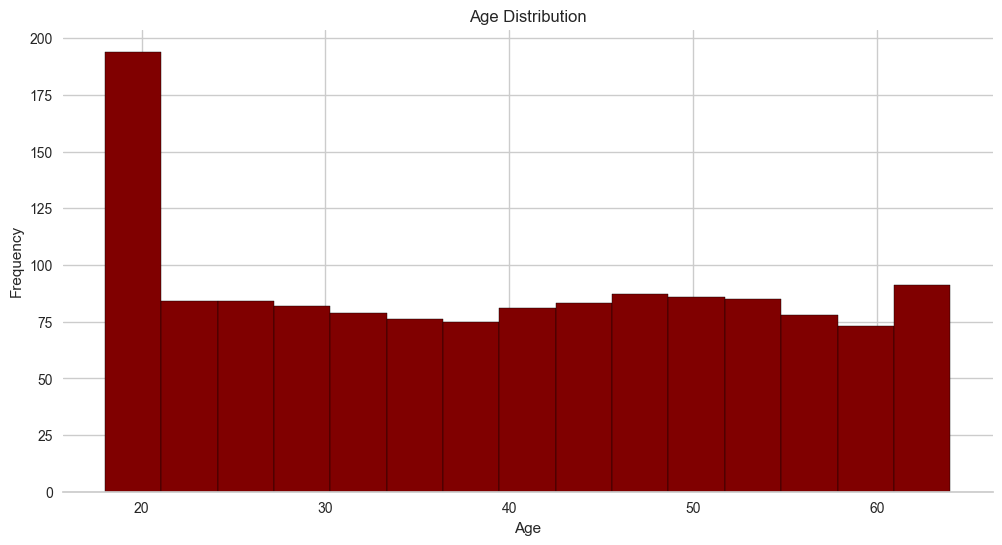

In [18]:
plt.figure(figsize=(12,6))

ax = plt.gca()

plt.hist(df["age"], bins = 15, color = "maroon", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

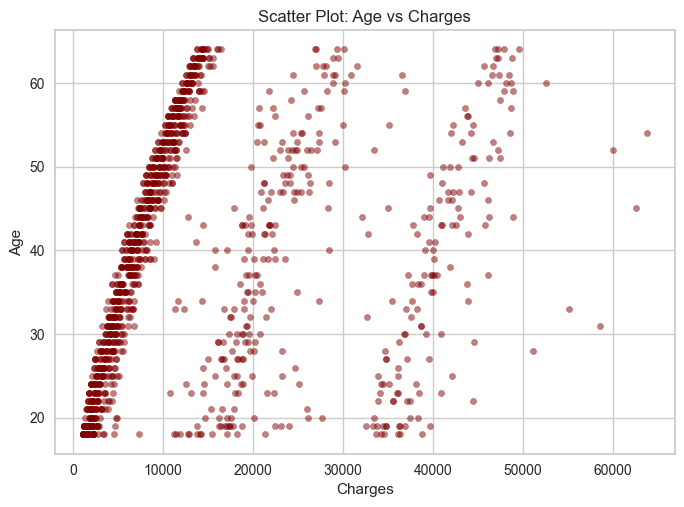

In [19]:
df.plot.scatter(x='charges', y='age', alpha=0.5, color="maroon")

plt.xlabel('Charges')
plt.ylabel('Age')
plt.title('Scatter Plot: Age vs Charges')

plt.show()

With the help of the scatter plot, we can identify, in relation to costs, where the age averages are positioned.

We identify where the darkest points are, where most customers are in the 0 to 11 thousand dollar range.

We can also identify what appear to be categories, where they follow the same patterns as the previous one, but a little further forward, portraying a higher cost.

We can see the pattern repeat on the chart 3 times.

We can also consider some outliers after 50 thousand dollars.

# Gender Distribution

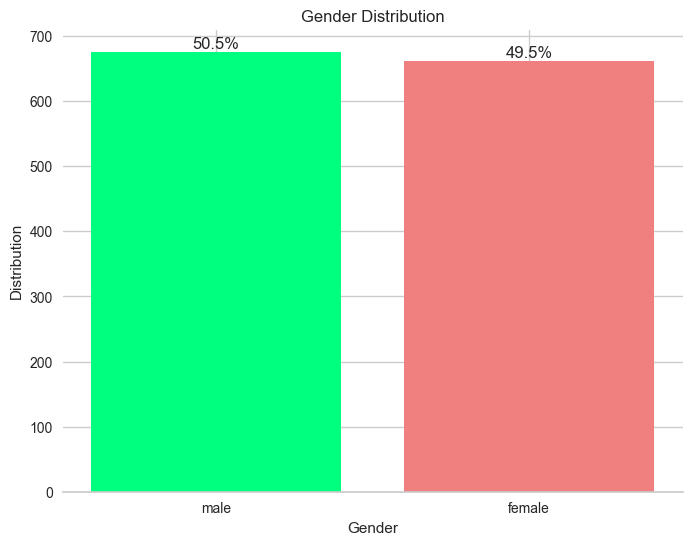

In [20]:
gender_counts = df["sex"].value_counts()

total = gender_counts.sum()
gender_percentages = (gender_counts / total) * 100

plt.figure(figsize=(8,6))
ax = plt.gca()
bars = plt.bar(gender_counts.index, gender_counts.values, color = ["springgreen", "lightcoral"])
plt.xlabel("Gender")
plt.ylabel("Distribution")
plt.title("Gender Distribution")

for bar, percentage in zip(bars, gender_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

In isolation, this gender distribution information does not tell us much.

But it is interesting to identify the almost 50/50 balance between them.

# BMI Distribution
BMI, or Body Mass Index, is a numerical measure used to assess an individual's body weight in relation to their height. It is calculated by dividing a person's weight by their height.

BMI provides an estimate of whether a person has a healthy body weight, is underweight, overweight, or obese, and it is often used in healthcare settings as a screening tool to evaluate potential health risks associated with an individual's weight.

BMI Categories:
Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

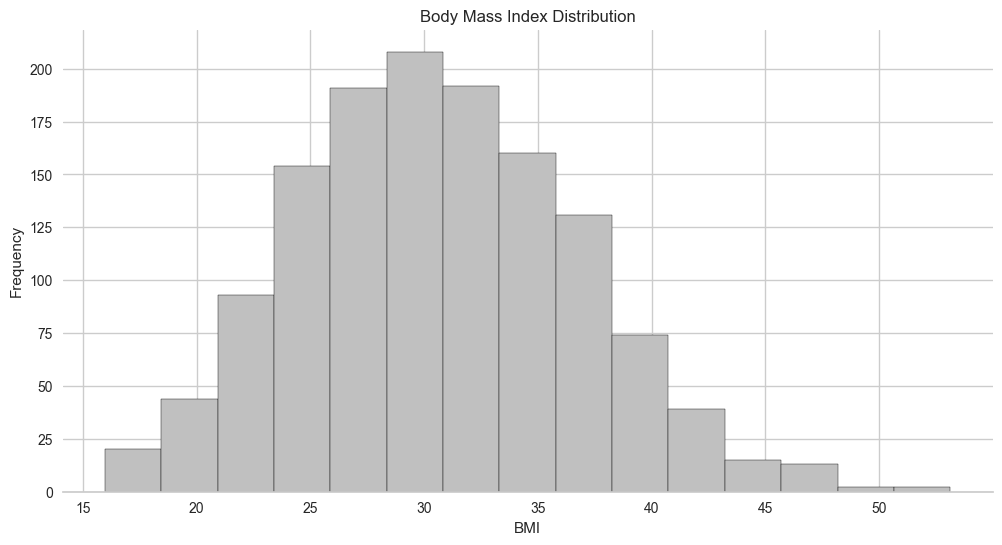

In [21]:
plt.figure(figsize=(12,6))

ax = plt.gca()

plt.hist(df["bmi"], bins = 15, color = "silver", edgecolor="black")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Body Mass Index Distribution")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

This is information that can make a real difference in our target variable, which will be "charges".

According to your BMI, you may be at greater risk of health problems, needing medical support more frequently and for longer, or, if you fall into a very healthy group, your risks may be reduced.

In our data set, we can observe that the largest number of patients are between 25 and 34 BMI, with the largest group being around 30 BMI.

And, according to established standards, these are bad numbers for the group.

According to this classification alone, only individuals with a BMI between 18.5 and 24.9 would be at their normal weight.

Above that, up to 29.9 would be overweight and above 30 BMI would be obese.

# Region

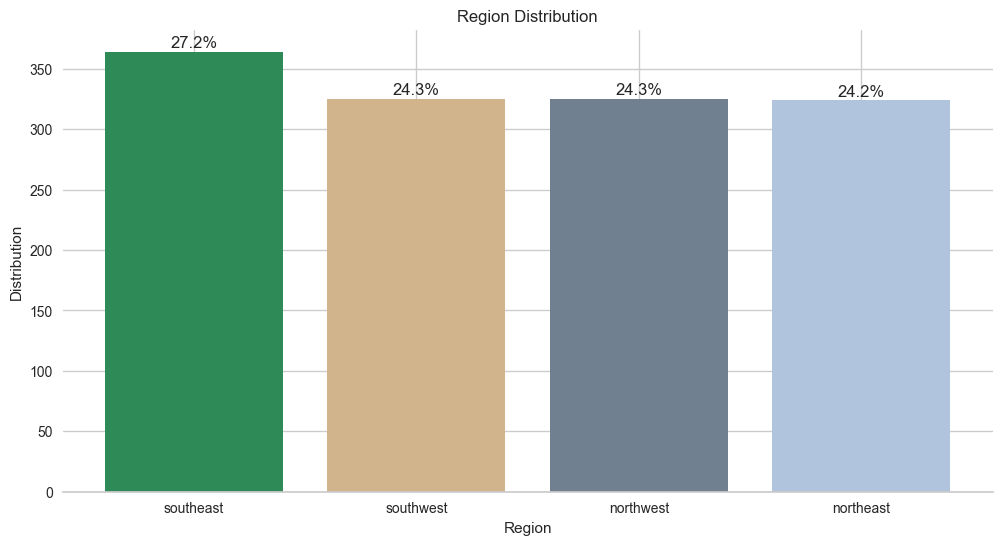

In [22]:
region_counts = df["region"].value_counts()

total = region_counts.sum()
region_percentages = (region_counts / total) * 100

plt.figure(figsize=(12,6))
ax = plt.gca()
bars = plt.bar(region_counts.index, region_counts.values, color = ["seagreen", "tan", "slategrey", "lightsteelblue"])
plt.xlabel("Region")
plt.ylabel("Distribution")
plt.title("Region Distribution")

for bar, percentage in zip(bars, region_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

We noticed a slightly larger distribution for the "southeast" group, but overall we identified a group that was selected in balance between regions.

# Smoker
This topic is very important in the context of health insurance.

It is common knowledge the harm that smoking brings to health. Therefore, it is natural to understand that a non-smoker will have different conditions when taking out health insurance.

This way, we will check the distribution between smokers and non-smokers in our database, and later, relate it to the costs involved for the customer.

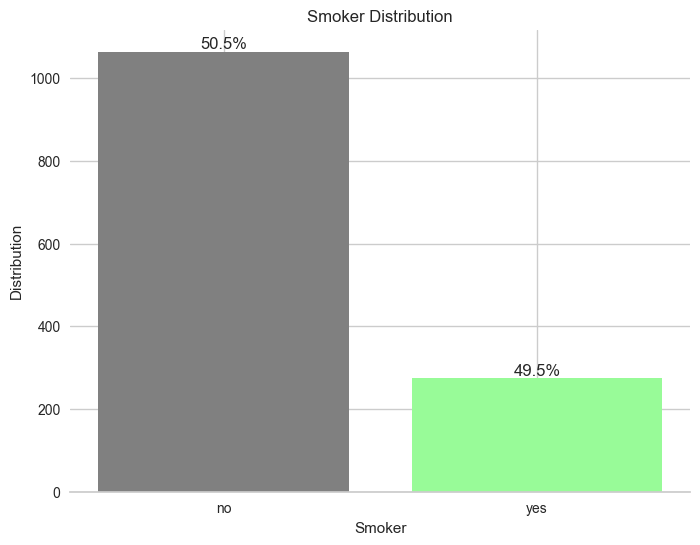

In [23]:
smoker_counts = df["smoker"].value_counts()

total = smoker_counts.sum()
smoker_percentages = (smoker_counts / total) * 100

plt.figure(figsize=(8,6))
ax = plt.gca()
bars = plt.bar(smoker_counts.index, smoker_counts.values, color = ["gray", "palegreen"])
plt.xlabel("Smoker")
plt.ylabel("Distribution")
plt.title("Smoker Distribution")

for bar, percentage in zip(bars, gender_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

The population of smoking customers is also balanced, with the majority being slightly non-smokers.

However, mathematically, we have an equivalent population between the two groups.

# Correlation Matrix
A correlation matrix is a fundamental tool in the analysis of a DataFrame, as it provides a comprehensive view of the relationships between variables.

This matrix displays correlation coefficients that measure the direction and strength of associations between data columns.

The utility of this matrix lies in identifying patterns and hidden trends in the data.

Values close to +1 indicate a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation.

Based on this information, analysts can make informed decisions, such as selecting relevant variables for statistical modeling or identifying multicollinearity, which can affect the accuracy of regression models.

In summary, the correlation matrix is a valuable tool for understanding relationships between variables and guiding deeper analyses.

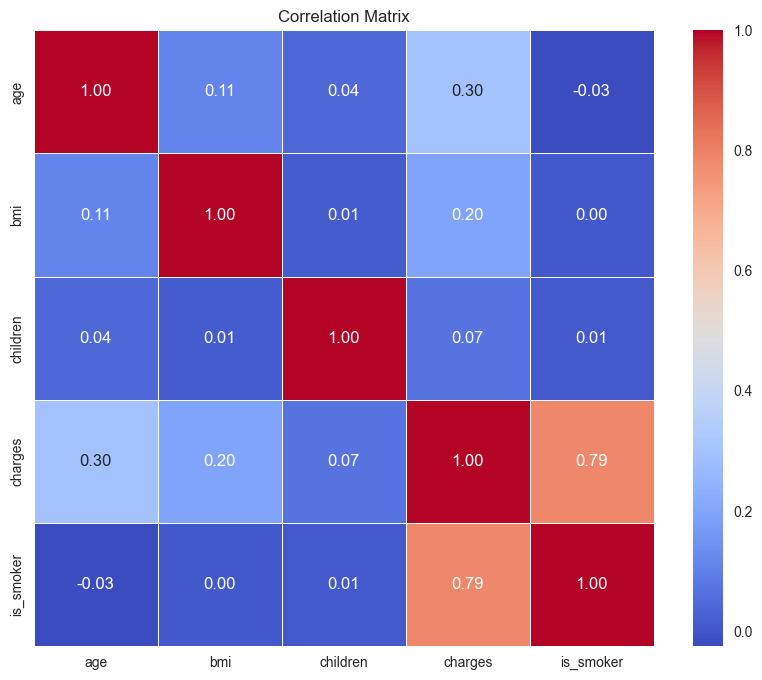

In [24]:
# Assuming 'sex' is a categorical variable
columns_to_remove = ["smoker", "has_children"]
numeric_columns = df.drop(columns=columns_to_remove).select_dtypes(include='number').columns
df_filtered = df[numeric_columns]
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

In our correlation matrix we identify variables related to each other, demonstrating the degree of relationship.

Considering the target variable as "charges", the correlation pattern follows the following order, from highest to lowest correlation:

"is_smoker" - The person being a smoker has a high degree of variation in the "charges" variable - 0.79.

"age" - The person's age also plays a role in relation to the costs involved, but to a lesser extent.

"bmi" - It was expected that BMI could have an impact on the "charges" column, however, with the correlation at just 0.20, we identified a low-impact relationship.

"children" - This is the variable with the smallest relation to "charges"

Note: We identified a negative relationship of -0.03 between "is_smoker" and "age".

# Auto ML Model
For our project we will use the Auto Machine Learning framework, PyCaret.

PyCaret is an open-source Python library designed to simplify the process of developing and deploying machine learning models.

Its functionality spans from data preparation to model selection and performance evaluation, all within a single environment.

PyCaret offers a high-level interface that enables data scientists and analysts to quickly explore various modeling techniques, optimize hyperparameters, and automate common tasks such as handling missing values and encoding categorical variables.

Additionally, PyCaret streamlines model deployment, making it a valuable tool for speeding up machine learning and data analysis projects, saving professionals time and effort.

PyCaret is closely related to the concept of AutoML (Automated Machine Learning).

AutoML refers to the automation of essential tasks in the machine learning model development lifecycle, such as data preprocessing, model selection, hyperparameter optimization, and performance evaluation.

When using PyCaret, users can leverage its AutoML capabilities to expedite and simplify the machine learning model development process.

PyCaret automates many of the tedious and complex tasks, allowing data scientists and analysts to focus more on interpreting results and making strategic decisions.

Through a single PyCaret environment, professionals can experiment with different modeling algorithms, optimize hyperparameters, perform cross-validation, generate performance visualizations, and even deploy models into production.

This makes the model creation process more efficient and accessible for a wide range of users, regardless of their level of expertise in machine learning. In summary, PyCaret is a tool that streamlines AutoML implementation and facilitates the development of high-quality machine learning models.

In [25]:
#separating data into test and training

test = df.sample(frac=0.10)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [26]:
print("Test Data:",test.shape)
print("Train Data:",train.shape)

Test Data: (134, 9)
Train Data: (1204, 9)


# Importing PyCaret Regression library

In [27]:
from pycaret.regression import *

At this point, we will pass our data to PyCaret to start exploring the data and preparing our model.

Here, we will create a regressor (reg), and we will pass the data, and the target variable.

In [28]:
reg = setup(data=train, target = "charges")

,Description,Value
0,Session id,3246
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1204, 9)"
4,Transformed data shape,"(1204, 12)"
5,Transformed train set shape,"(842, 12)"
6,Transformed test set shape,"(362, 12)"
7,Ordinal features,2
8,Numeric features,5
9,Categorical features,3


# Creating a Pipeline

In [29]:
reg = setup(data = train,
            target = "charges",
            normalize = True,
            log_experiment = True,
            experiment_name = "charges_01")

,Description,Value
0,Session id,4764
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1204, 9)"
4,Transformed data shape,"(1204, 12)"
5,Transformed train set shape,"(842, 12)"
6,Transformed test set shape,"(362, 12)"
7,Ordinal features,2
8,Numeric features,5
9,Categorical features,3


2024/02/03 04:57:53 INFO mlflow.tracking.fluent: Experiment with name 'charges_01' does not exist. Creating a new experiment.


# Comparing Models

If you have a specific model you need to use, there is no need to compare models, but in the real world this will rarely be the case. It is usually necessary to evaluate and decide the best model to use.

To do this, comparing all models will be a good starting point.

This function trains all models in the PyCaret library and evaluates them using cross-validation. For evaluation, the function prints a table that shows the average of MAE, MSE, RMSE, R2, RMSLE and MAPE across the folds (10 by default) of all models available in the library.

MAE - Mean Absolute Error shows the mean error in absolute values.
MSE - Mean Squared Error
RMSE - Root Mean Squared Error
R2 - Coefficient of Determination R2 Score
RMSLE - Root Mean Squared Log Error
MAPE - Mean Absolute Percentage Error shows the mean absolute error in percentage values.

In [30]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [31]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2747.5321,23899966.6360,4848.1940,0.8225,0.4428,0.3182,0.0160
rf,Random Forest Regressor,2894.5976,26570103.9047,5130.0268,0.8028,0.4748,0.3399,0.0340
lightgbm,Light Gradient Boosting Machine,3109.6545,27060927.6442,5170.7519,0.7988,0.5461,0.3842,0.4100
et,Extra Trees Regressor,2940.0200,29168079.4192,5356.8972,0.7856,0.4786,0.3247,0.0280
ada,AdaBoost Regressor,4511.4817,30262909.0091,5484.4432,0.7737,0.6499,0.7817,0.0110
knn,K Neighbors Regressor,3835.3039,37743023.0000,6111.9779,0.7213,0.5082,0.4075,0.0100
lasso,Lasso Regression,4183.7217,37955240.8942,6111.3720,0.7204,0.5555,0.4340,0.0090
ridge,Ridge Regression,4184.5015,37956680.3953,6111.5285,0.7204,0.5551,0.4342,0.0080
br,Bayesian Ridge,4186.9186,37955442.0487,6111.5948,0.7204,0.5550,0.4354,0.0090
lr,Linear Regression,4165.2499,38017965.1674,6116.1736,0.7200,0.5497,0.4293,0.1670


More than 15 models were created, using 10 folds of cross-validation and we evaluated the models based on the 6 most used evaluation metrics (MAE, MSE, RMSE, R2, RMSLE and MAPE).

The score table printed above highlights the models with the best results in the evaluation metrics averages for comparison. By default, the grid is organized from R2 (Highest to lowest)

In [32]:
print ("The best model found by the function was:", best)

The best model found by the function was: GradientBoostingRegressor(random_state=4764)


# Instantiating the Model
The best model found was the Gradient Boosting Regressor or GBR.

The compare_models() function is very useful and makes the work easier, but it does not return a trained model.

Given this, we will use the GBR model and focus on our model.

In [33]:
gbr = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3013.9180,26799402.1249,5176.8139,0.7771,0.5243,0.2883
1,2197.3480,16136982.2197,4017.0863,0.8764,0.4869,0.3883
2,2765.1506,22212640.9292,4713.0288,0.8206,0.3629,0.2829
3,2557.9303,23510305.0851,4848.7426,0.8011,0.4418,0.3310
4,2686.8343,21568309.1289,4644.1694,0.8539,0.4013,0.3454
5,2526.5179,18674163.2729,4321.3613,0.8687,0.3493,0.2848
6,2417.3066,16793259.1744,4097.9579,0.8551,0.3884,0.3160
7,3668.8968,38816772.3253,6230.3108,0.7218,0.6486,0.4021
8,3086.7708,29190438.9221,5402.8177,0.8340,0.4456,0.3148


Just like in compare_models, in create_model you can change the number of folds, passing the parameter create_model('gbr', fold = 5) to create a GBR with cross validation with 5 folds for example.

# Model Tuning
When a model is created using create_model() it uses the default hyperparameters for each model. To tune these parameters, we use the tune_model() function.

In [34]:
tuned_gbr = tune_model(gbr, optimize = "R2")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2893.7048,23936496.1959,4892.4939,0.8010,0.5067,0.2954
1,2630.3254,18270226.7032,4274.3686,0.8601,0.5479,0.4777
2,2766.1181,21058416.9330,4588.9451,0.8299,0.3752,0.3032
3,2656.3075,23666010.6446,4864.7724,0.7998,0.4517,0.3500
4,2769.2260,22149302.3155,4706.3045,0.8500,0.3909,0.3274
5,2525.5794,18178939.1135,4263.6767,0.8722,0.3577,0.2974
6,2470.3105,14658605.8123,3828.6559,0.8735,0.3784,0.3314
7,3597.3353,37840762.1201,6151.4845,0.7288,0.6223,0.3283
8,3028.3439,27098572.8946,5205.6290,0.8459,0.4405,0.3073


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [35]:
print(tuned_gbr)

GradientBoostingRegressor(max_depth=2, max_features='sqrt',
                          min_impurity_decrease=0.4, min_samples_leaf=2,
                          n_estimators=270, random_state=4764, subsample=0.75)


# Plotting Models
With the plot_model() function we will plot visualizations about the performance of our model, such as Residual Plots, Prediction Error, Feature Importance, etc.

This function takes the trained model as input and returns a plot based on performance with the chunk of the dataset separated for testing.

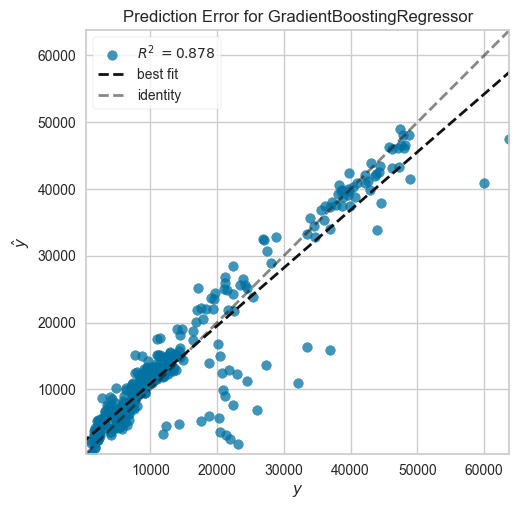

In [36]:
plot_model(tuned_gbr, plot="error")

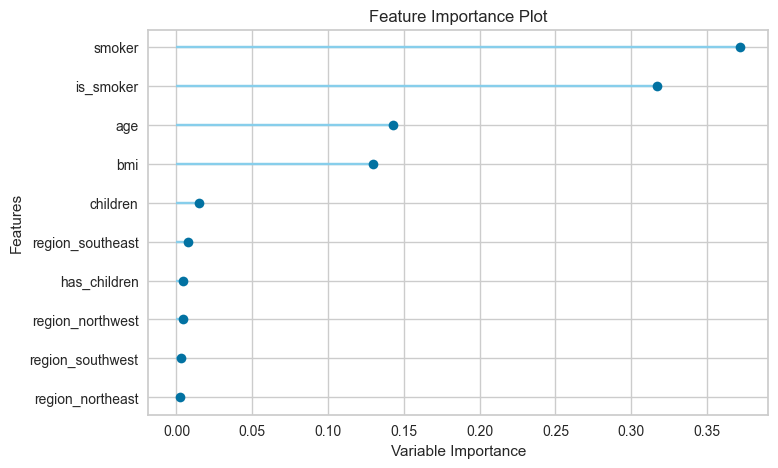

In [37]:
plot_model(tuned_gbr, plot="feature")

In [38]:
plot_model(tuned_gbr, plot="parameter")

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,squared_error
max_depth,2
max_features,sqrt
max_leaf_nodes,None
min_impurity_decrease,0.4


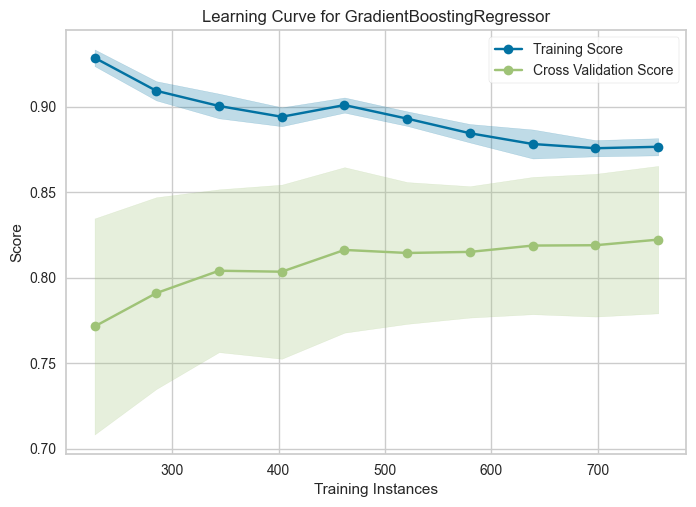

In [39]:
plot_model(tuned_gbr, plot="learning")

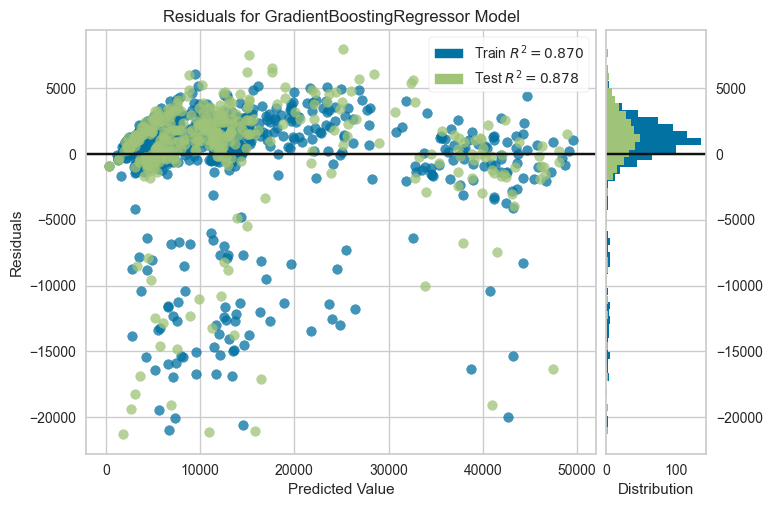

In [41]:
plot_model(tuned_gbr, plot="residuals")

# Making Predictions
We will do a final check, making predictions on the test set and reviewing the evaluation metrics.

The objective here is to verify the difference in performance between the results of cross-validation and new data.

In [42]:
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2771.6083,21030031.7747,4585.8513,0.8777,0.4453,0.3136


The R2 on the test set was 0.8447, compared to 0.8263 in the previous average. This is not a significant difference.

If there was a significant difference between these results, it would normally be an indication of over-fitting, or factors that would require further investigation. In this case, let's move on to finalizing the model and making predictions on unseen sets.

Everything is ready to finalize the model.

# Finalizing the Model
Finalizing the model is the last step of our project.

The finalize_model() function fits the model, including the previously separated test set within PyCaret (30% in this case).

The purpose of this is to train the model on the complete dataset before deploying to production.

In [43]:
final_gbr = finalize_model(tuned_gbr)

Using the finalize_model() function, the entire dataset, including the part that had previously been separated for testing, is used for training.

Therefore, if the model is used to make predictions on the test set separated by PyCaret after the finalize function has been used, the results will be misleading because you will be making predictions on data already seen by the model.

To demonstrate this, I will use the finished model with predict_model() to compare the results with those we had in the previous part.

In [44]:
pred_holdout = predict_model(final_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2433.8075,17283108.3890,4157.2958,0.8995,0.3858,0.2842


In [45]:
print(final_gbr)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children',
                                             'is_smoker', 'has_children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(includ...
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estima

# Predicting on New Data

We will now pass as data the data that has not yet been seen by the model, previously separated, at the beginning of the project.

This set contains 10% of the original dataset. This portion has never been exposed to PyCaret, and is perfect for simulating new real data that will be received by the model in production.

In [46]:
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2329.6372,13721979.3542,3704.3190,0.9004,0.3465,0.2760


,age,sex,bmi,children,smoker,region,is_smoker,has_children,charges,prediction_label
0,31,female,25.740000,0,no,southeast,0,0,3756.621582,3588.282081
1,31,male,30.875000,0,no,northeast,0,0,3857.759277,5696.968415
2,37,male,34.099998,4,yes,southwest,1,1,40182.246094,37362.509409
3,37,male,36.189999,0,no,southeast,0,0,19214.705078,5328.444049
4,18,male,23.320000,1,no,southeast,0,1,1711.026855,3500.003765


The label column is added to the new set.

The Label is the value predicted by the GBR model.

# Conclusion
We understand that in the context of health insurance, there are variables that will directly affect the costs involved.

We also identified that there are some points that are not relevant when dealing with the subject.

In the context of our database, information such as region and number of children has no relationship with this "charges" factor. Even the BMI, which is an indicator of health and can indicate a high risk of health problems in the future, if the individual's BMI is very high, it does not imply a major impact on costs.

On the other hand, the client's age and, mainly, whether he is a smoker or not, weigh heavily when health insurance determines the ideal contract value.

We were able to verify this information visually through the plotted graphs and mainly also with the correlation matrix, which made the points of interest and irrelevant points clear.

Using the PyCaret library, we use Auto Machine Learning to create our model, initially separating training and test data.

With the pipeline created, we had the opportunity to compare models automatically and in an agile way, to discover the best model to use, considering the best performance in the R2 Score

We use the Gradient Boosting Regressor (GBR) and also perform the tuning automatically. We were also able to identify, through the feature importance plot, that the greatest weight is given to customers who smoke regularly.

After carrying out the exploratory and model analyses, we performed predictions with a good level of accuracy, reaching 0.8849 on data that had not been seen previously.

Where for example we can:

Real - 48970.246094

Predicted - 48052.400889

Real - 1632.564453

Predicted - 2021.976012

It was possible to observe the power of Auto Machine Learning, and how it becomes a useful and optimizing tool for data scientists and analysts.

There are many other points to address in relation to this topic, but with this project it is now possible to have a starting point with PyCaret and Auto Machine Learning, as well as exploring the library to create even more complex work.